## SVR

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("D:\\Kaustav MBA\\TERM3\\Machine_Learning\\Position_Salaries.csv")

In [5]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
X=data.iloc[ : , 1:2].values
Y=data.iloc[ : ,2:].values 

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()

In [9]:
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
X=sc_x.transform(X)
sc_y=StandardScaler()
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)
Y=sc_y.transform(Y)

C:\Users\Payal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


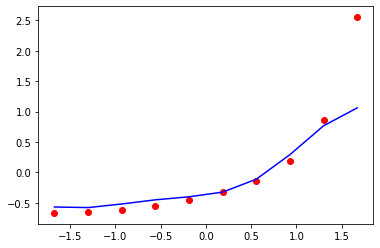

In [10]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,Y)
plt.scatter(X,Y,color="red")
plt.plot(X,regressor.predict(X),color="blue")
plt.show()

In [11]:
print(sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]]))))

[171640.87069654]


In [12]:
print(regressor.predict(sc_x.transform([[6.5]])))

[-0.24101628]


In [13]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`sklearn.svm.LinearSVR` or
 |  :class:`sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorith

## Decision Tree

 -- Feature Scaling is not required in decision tree

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"mse", "friedman_mse", "mae"}, default="mse"
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion and minimizes the L2 loss
 |      using the mean of each terminal node, "friedman_mse", which uses mean
 |      squared error with Friedman's improvement score for potential spli

In [17]:
data=pd.read_csv("D:\\Kaustav MBA\\TERM3\\Machine_Learning\\Position_Salaries.csv")
reg = DecisionTreeRegressor()
X=data.iloc[ : , 1:2].values
Y=data.iloc[ : ,2:].values 

In [18]:
reg.fit(X,Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [19]:
Y_pred=reg.predict([[9.5]])

In [20]:
Y_pred

array([500000.])

In [21]:
x_grid = np.arange(min(X),max(X),0.01)
x_grid=x_grid.reshape(len(x_grid),1)

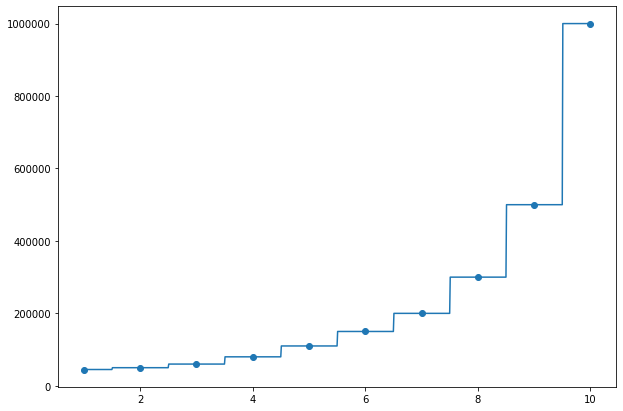

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(X,Y)
plt.plot(x_grid,reg.predict(x_grid))
plt.show()

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
data=pd.read_csv("D:\\Kaustav MBA\\TERM3\\Machine_Learning\\Position_Salaries.csv")
reg_rf = RandomForestRegressor(n_estimators=5,max_depth=2)#No. of bags/trees
X=data.iloc[ : , 1:2].values
Y=data.iloc[ : ,2:].values 

In [25]:
reg_rf.fit(X,Y)

C:\Users\Payal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

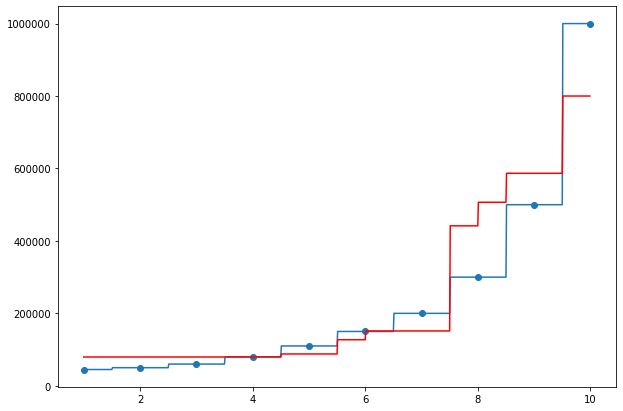

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(X,Y)
plt.plot(x_grid,reg.predict(x_grid))
plt.plot(x_grid,reg_rf.predict(x_grid),color='red')
plt.show()